# Customisation of the First NLP Notebook

I decided to use a dataset filled with the dialogue within the Harry Potter Books as they are some of my favorite books and thought it might be interesting to explore.

But firstly we need to load our data set and have a look at some visualisations, as there are so many characters I decided to use only use the top 10 charaters with the most dialogue.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Dialogue.csv', encoding='ISO-8859-1')

In [3]:
df.head()

,Dialogue ID,Chapter ID,Place ID,Character ID,Dialogue
0,1,1,8,4,I should have known that you would be here...P...
1,2,1,8,7,"Good evening, Professor Dumbledore. Are the ru..."
2,3,1,8,4,"I'm afraid so, Professor. The good, and the bad."
3,4,1,8,7,And the boy?
4,5,1,8,4,Hagrid is bringing him.


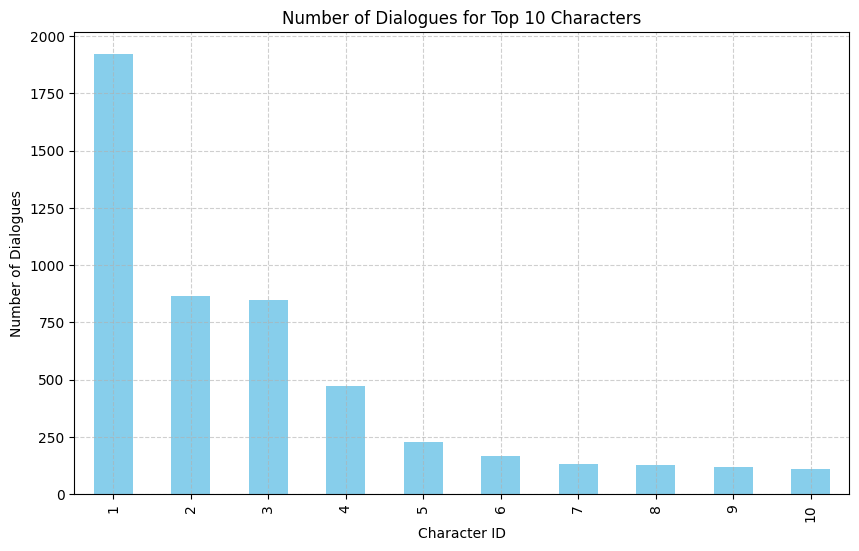

In [4]:
# Let's identify the top 10 characters by dialogue count and then create a visualization for only those characters.
import matplotlib.pyplot as plt

# Count the number of dialogues per character
dialogue_counts = df['Character ID'].value_counts()

# Find the top 10 characters
top_10_characters = dialogue_counts.head(10)

# Create a bar plot for the top 10 characters
plt.figure(figsize=(10, 6))
top_10_characters.plot(kind='bar', color='skyblue')
plt.title('Number of Dialogues for Top 10 Characters')
plt.xlabel('Character ID')
plt.ylabel('Number of Dialogues')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


It is interesting but also expected to see the sharp decline in number of dialogues, but right now we can only see a number as the Character ID so lets retrieve some lines so we can see which character talks how much.

In [5]:

# Get the IDs of the top 10 characters
top_10_character_ids = top_10_characters.index.tolist()

# Filter the data to include only the top 10 characters and select the first two dialogues for each
top_10_dialogues = df[df['Character ID'].isin(top_10_character_ids)].groupby('Character ID').head(2)

# Display the selected dialogues
top_10_dialogues


,Dialogue ID,Chapter ID,Place ID,Character ID,Dialogue
0,1,1,8,4,I should have known that you would be here...P...
1,2,1,8,7,"Good evening, Professor Dumbledore. Are the ru..."
2,3,1,8,4,"I'm afraid so, Professor. The good, and the bad."
3,4,1,8,7,And the boy?
7,8,1,8,5,"Professor Dumbledore, Sir. Professor McGonagall."
9,10,1,8,5,"No, sir. Little tyke fell asleep just as we we..."
21,22,2,8,1,"Yes, Aunt Petunia."
24,25,2,8,1,"Yes, Uncle Vernon."
196,197,10,42,2,"Excuse me, do you mind? Everywhere else is full."
198,199,10,42,2,"I'm Ron, by the way. Ron Weasley."


As we can see the first few chracters being Harry, Ron and Hermione are quite obvious. One character I didn't expect to see on the 8th position was professor Slughorn.

## Preprocessing the Data for NLP

As we can see, the data still needs to be thoroughly cleaned. I'll focus on the Dialogue column and start by removing any empty messages. Next, I'll clean up the text by stripping away HTML tags, URLs, and unnecessary characters like punctuation or numbers. After that, I'll make everything lowercase to ensure consistency across similar words. Then, I'll break the text into smaller pieces, or tokens—this helps in handling different phrases or words effectively. Following that, I'll remove common words, or stop words, that don't add much meaning to our analysis. Lastly, I'll apply lemmatization to simplify words to their root form, making sure variations of a word are analyzed as one.

In [ ]:
import re
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
#nltk.download('punkt_tab')
#nltk.download('stopwords')
#nltk.download('wordnet')

In [12]:

# Define the text cleaning functions
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'#', '', text)  # Remove hashtags but keep the text
    text = re.sub(r'\.\.\.', ' ', text)  # Replace ellipses with a space
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove special characters and numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove additional white spaces
    return text

def case_normalization(text):
    return text.lower()

def tokenize(text):
    return word_tokenize(text)  # Using NLTK for better tokenization

def remove_stopwords(tokens):
    # Combine default English stopwords with custom stopwords as I found that there were not enough stopwords in the nltk package
    stop_words = set(stopwords.words('english'))
    custom_stop_words = {
        'a', 'as', 'able', 'about', 'above', 'according', 'accordingly', 'across', 'actually',
        'after', 'afterwards', 'again', 'against', 'ah', 'aint', 'all', 'allow', 'allows', 'almost',
        'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an',
        'and', 'another', 'any', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways',
        'anywhere', 'apart', 'appear', 'appreciate', 'appropriate', 'are', 'arent', 'around',
        'aside', 'ask', 'asking', 'associated', 'at', 'available', 'away', 'awfully', 'b', 'be',
        'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand',
        'behind', 'being', 'believe', 'below', 'beside', 'besides', 'best', 'better', 'between',
        'beyond', 'both', 'brief', 'but', 'by', 'c', 'cmon', 'cs', 'came', 'can', 'cant', 'cannot',
        'cause', 'causes', 'certain', 'certainly', 'changes', 'clearly', 'co', 'com', 'come',
        'comes', 'concerning', 'consequently', 'consider', 'considering', 'contain', 'containing',
        'contains', 'corresponding', 'could', 'couldnt', 'course', 'currently', 'd', 'definitely',
        'described', 'despite', 'did', 'didnt', 'different', 'do', 'does', 'doesnt', 'doing',
        'dont', 'done', 'down', 'downwards', 'during', 'e', 'each', 'edu', 'eg', 'eight', 'either',
        'else', 'elsewhere', 'enough', 'entirely', 'especially', 'et', 'etc', 'even', 'ever',
        'every', 'everybody', 'everyone', 'everything', 'everywhere', 'ex', 'exactly', 'example',
        'except', 'f', 'far', 'few', 'fifth', 'first', 'five', 'followed', 'following', 'follows',
        'for', 'former', 'formerly', 'forth', 'four', 'from', 'further', 'furthermore', 'g', 'get',
        'gets', 'getting', 'given', 'gives', 'go', 'goes', 'going', 'gone', 'got', 'gotten',
        'greetings', 'h', 'had', 'hadnt', 'happens', 'hardly', 'has', 'hasnt', 'have', 'havent',
        'having', 'he', 'hes', 'hello', 'help', 'hence', 'her', 'here', 'heres', 'hereafter',
        'hereby', 'herein', 'hereupon', 'hers', 'herself', 'hi', 'him', 'himself', 'his', 'hither',
        'hopefully', 'how', 'howbeit', 'however', 'i', 'id', 'ill', 'im', 'ive', 'ie', 'if',
        'ignored', 'immediate', 'in', 'inasmuch', 'inc', 'indeed', 'indicate', 'indicated',
        'indicates', 'inner', 'insofar', 'instead', 'into', 'inward', 'is', 'isnt', 'it', 'itd',
        'itll', 'its', 'itself', 'j', 'just', 'k', 'keep', 'keeps', 'kept', 'know', 'knows',
        'known', 'l', 'last', 'lately', 'later', 'latter', 'latterly', 'least', 'less', 'lest',
        'let', 'lets', 'like', 'liked', 'likely', 'little', 'look', 'looking', 'looks', 'ltd', 'm',
        'mainly', 'many', 'may', 'maybe', 'me', 'mean', 'meanwhile', 'merely', 'might', 'more',
        'moreover', 'most', 'mostly', 'much', 'must', 'my', 'myself', 'n', 'name', 'namely', 'nd',
        'near', 'nearly', 'necessary', 'need', 'needs', 'neither', 'never', 'nevertheless', 'new',
        'next', 'nine', 'no', 'nobody', 'non', 'none', 'noone', 'nor', 'normally', 'not', 'nothing',
        'novel', 'now', 'nowhere', 'o', 'obviously', 'of', 'off', 'often', 'oh', 'ok', 'okay',
        'old', 'on', 'once', 'one', 'ones', 'only', 'onto', 'or', 'other', 'others', 'otherwise',
        'ought', 'our', 'ours', 'ourselves', 'out', 'outside', 'over', 'overall', 'own', 'p',
        'particular', 'particularly', 'per', 'perhaps', 'placed', 'please', 'plus', 'possible',
        'presumably', 'probably', 'provides', 'q', 'que', 'quite', 'qv', 'r', 'rather', 'rd', 're',
        'really', 'reasonably', 'regarding', 'regardless', 'regards', 'relatively', 'respectively',
        'right', 's', 'said', 'same', 'saw', 'say', 'saying', 'says', 'second', 'secondly', 'see',
        'seeing', 'seem', 'seemed', 'seeming', 'seems', 'seen', 'self', 'selves', 'sensible', 'sent',
        'serious', 'seriously', 'seven', 'several', 'shall', 'she', 'should', 'shouldnt', 'since',
        'six', 'so', 'some', 'somebody', 'somehow', 'someone', 'something', 'sometime', 'sometimes',
        'somewhat', 'somewhere', 'soon', 'sorry', 'specified', 'specify', 'specifying', 'still',
        'sub', 'such', 'sup', 'sure', 't', 'ts', 'take', 'taken', 'tell', 'tends', 'th', 'than',
        'thank', 'thanks', 'thanx', 'that', 'thats', 'the', 'their', 'theirs', 'them', 'themselves',
        'then', 'thence', 'there', 'theres', 'thereafter', 'thereby', 'therefore', 'therein',
        'thereupon', 'these', 'they', 'theyd', 'theyll', 'theyre', 'theyve', 'think', 'third',
        'this', 'thorough', 'thoroughly', 'those', 'though', 'three', 'through', 'throughout',
        'thru', 'thus', 'to', 'together', 'too', 'took', 'toward', 'towards', 'tried', 'tries',
        'truly', 'try', 'trying', 'twice', 'two', 'u', 'un', 'under', 'unfortunately', 'unless',
        'unlikely', 'until', 'unto', 'up', 'upon', 'us', 'use', 'used', 'useful', 'uses', 'using',
        'usually', 'uucp', 'v', 'value', 'various', 'very', 'via', 'viz', 'vs', 'w', 'want', 'wants',
        'was', 'wasnt', 'way', 'we', 'wed', 'well', 'were', 'weve', 'welcome', 'well', 'went',
        'were', 'werent', 'what', 'whats', 'whatever', 'when', 'whence', 'whenever', 'where',
        'wheres', 'whereafter', 'whereas', 'whereby', 'wherein', 'whereupon', 'wherever', 'whether',
        'which', 'while', 'whither', 'who', 'whos', 'whoever', 'whole', 'whom', 'whose', 'why',
        'will', 'willing', 'wish', 'with', 'within', 'without', 'wont', 'wonder', 'would', 'would',
        'wouldnt', 'x', 'y', 'yes', 'yet', 'you', 'youd', 'youll', 'youre', 'youve', 'your',
        'yours', 'yourself', 'yourselves', 'z', 'zero'
    }
    stop_words.update(custom_stop_words)
    return [token for token in tokens if token not in stop_words]


def lemmatize(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]


# Create a new DataFrame by copying the original data
clean_data = df.copy()

def process_text(text):
    cleaned = clean_text(text)
    normalized = case_normalization(cleaned)
    tokens = tokenize(normalized)
    no_stopwords = remove_stopwords(tokens)
    lemmatized = lemmatize(no_stopwords)
    return ' '.join(lemmatized)  # Join the lemmatized words back into a single string

clean_data['Dialogue'] = clean_data['Dialogue'].fillna('').astype(str)
clean_data['Dialogue'] = clean_data['Dialogue'].apply(process_text)

# Filter out empty dialogues and reset the index
clean_data = clean_data[clean_data['Dialogue'].map(len) > 0]
clean_data.reset_index(drop=True, inplace=True)

# Aave the cleaned data to a new CSV file
clean_data.to_csv('HPdf.csv', index=False)


In [13]:
clean_data.head()

,Dialogue ID,Chapter ID,Place ID,Character ID,Dialogue
0,1,1,8,4,professor mcgonagall
1,2,1,8,7,good evening professor dumbledore rumour true ...
2,3,1,8,4,afraid professor good bad
3,4,1,8,7,boy
4,5,1,8,4,hagrid bringing


In [14]:
clean_data.shape[0]

6488

## Text Representation - Bag of Words

I will now look at the frequency of words used in the dialogue which might be fun after the text was all processed. My hypothesis is that the most used word will be Harry or Professor or a common verb or noun like run or school.

In [15]:
import pandas as pd
from collections import Counter

# Assuming 'clean_data' is your DataFrame with the 'Dialogue' column

# Replace NaN with empty string and ensure all entries are strings
clean_data['Dialogue'] = clean_data['Dialogue'].fillna('')  # Replace NaN with empty string
clean_data['Dialogue'] = clean_data['Dialogue'].astype(str)  # Ensure all entries are strings

# Concatenate all dialogues into a single list of words
words = []
for dialogue in clean_data['Dialogue']:
    words.extend(dialogue.split())  # Split the dialogue into words and add them to the list

# Define the bag of words function
def bag_of_words(tokens):
    return Counter(tokens)

# Create a bag-of-words
bow = bag_of_words(words)

# Display the most common words
print(bow.most_common(20))


[('harry', 689), ('potter', 311), ('sir', 198), ('time', 183), ('professor', 175), ('ron', 175), ('good', 171), ('dumbledore', 164), ('back', 158), ('hermione', 139), ('mr', 138), ('boy', 129), ('thing', 122), ('hagrid', 118), ('find', 109), ('year', 108), ('yeah', 107), ('make', 104), ('kill', 102), ('day', 101)]


## TF_ID

This is a bit better than bag of words as it shows the frequency and uniqueness so lets try that!

In [16]:
import pandas as pd
import math
from collections import Counter

def compute_tf(documents):
    """
    Compute the term frequency for each document.
    """
    tf_documents = []
    for document in documents:
        # Count the frequency of each term in the document
        tf_documents.append(Counter(document))
    return tf_documents

def compute_idf(tf_documents):
    """
    Compute the inverse document frequency for all terms.
    """
    df = Counter()
    for tf in tf_documents:
        for term in tf.keys():
            df[term] += 1

    # Compute the IDF for each term
    idf = {}
    total_documents = len(tf_documents)
    for term, count in df.items():
        idf[term] = math.log(total_documents / float(count))
    return idf

def compute_tf_idf_manual(documents):
    """
    Manually compute the TF-IDF for each term in each document.
    """
    tf_documents = compute_tf(documents)
    idf = compute_idf(tf_documents)

    tf_idf_documents = []
    for tf in tf_documents:
        tf_idf = {}
        for term, frequency in tf.items():
            tf_idf[term] = frequency * idf[term]
        tf_idf_documents.append(tf_idf)

    return tf_idf_documents

def get_highest_values(input_dict, N=1):
    """
    Sort the dictionary by value in descending order and select the top N items.
    """
    return sorted(input_dict.items(), key=lambda item: item[1], reverse=True)[:N]

# Tokenize the dialogues
documents = [d.split() for d in clean_data['Dialogue']]

# Compute TF-IDF manually
tf_idf_results = compute_tf_idf_manual(documents)

# Print the TF-IDF for the first few documents and their top 3 terms
for i, doc_tf_idf in enumerate(tf_idf_results[:10]):
    print(f"Document {i+1} TF-IDF:", get_highest_values(doc_tf_idf, 3))



Document 1 TF-IDF: [('mcgonagall', 5.944496251739032), ('professor', 3.6778431679710506)]
Document 2 TF-IDF: [('rumour', 8.77770959579525), ('evening', 5.781977322241258), ('albus', 5.686667142436933)]
Document 3 TF-IDF: [('afraid', 5.376512214133093), ('bad', 5.088830141681313), ('professor', 3.6778431679710506)]
Document 4 TF-IDF: [('boy', 3.949395858492948)]
Document 5 TF-IDF: [('bringing', 8.084562415235304), ('hagrid', 4.077229230002833)]
Document 6 TF-IDF: [('wise', 6.985950126567194), ('important', 5.944496251739032), ('trust', 5.281202034328769)]
Document 7 TF-IDF: [('trust', 5.281202034328769), ('life', 4.845883963070923), ('hagrid', 4.077229230002833)]
Document 8 TF-IDF: [('professor', 7.355686335942101), ('mcgonagall', 5.944496251739032), ('dumbledore', 3.7214637904469408)]
Document 9 TF-IDF: [('problem', 6.475124502801203), ('trust', 5.281202034328769), ('hagrid', 4.077229230002833)]
Document 10 TF-IDF: [('tyke', 8.77770959579525), ('bristol', 8.77770959579525), ('asleep', 

So each document is a line dialogue. This shows how important each word is in the line. I think it makes sense, but it is probably better when there are longer lines as some of these are a bit short which makes it hard to actually show something new or interesting. But lets try to analysis some random consecutive lines and see if we can understand what they are talking about.

In [17]:
import random

#Choose a random starting index for five consecutive dialogues
random_index = random.randint(0, len(clean_data) - 6)  # Ensure space for five dialogues
documents = [d.split() for d in clean_data['Dialogue'][random_index:random_index + 5]]

# Compute TF-IDF manually for these five dialogues
tf_idf_results = compute_tf_idf_manual(documents)

# Print the TF-IDF for each of the five consecutive documents
print(f"Analyzing dialogues from index {random_index} to {random_index+4}:")
for i, doc_tf_idf in enumerate(tf_idf_results):
    print(f"Document {random_index + i + 1} TF-IDF:", get_highest_values(doc_tf_idf, 3))


Analyzing dialogues from index 4289 to 4293:
Document 4290 TF-IDF: [('potter', 1.6094379124341003)]
Document 4291 TF-IDF: [('good', 1.6094379124341003)]
Document 4292 TF-IDF: [('enjoying', 1.6094379124341003), ('ourself', 1.6094379124341003)]
Document 4293 TF-IDF: [('open', 1.6094379124341003), ('period', 1.6094379124341003), ('morning', 1.6094379124341003)]
Document 4294 TF-IDF: [('noticed', 1.6094379124341003), ('fill', 1.6094379124341003), ('potion', 1.6094379124341003)]


## Sentiment Analysis with VADER

Next lets try to run sentiment anlysis on the dialogue lines and then we can do some statistics or visualisations to explore how the sentiment changes throughout time or characters.

For this I am using my non preprocessed data set as removing simple words can produce bad results!

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


# Create an instance of the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to perform sentiment analysis
def get_sentiment(text):
    sentiment = analyzer.polarity_scores(str(text))
    compound_score = sentiment['compound']
    return compound_score

# Apply the function to the 'Dialogue' column
df['sentiment'] = df['Dialogue'].apply(get_sentiment)


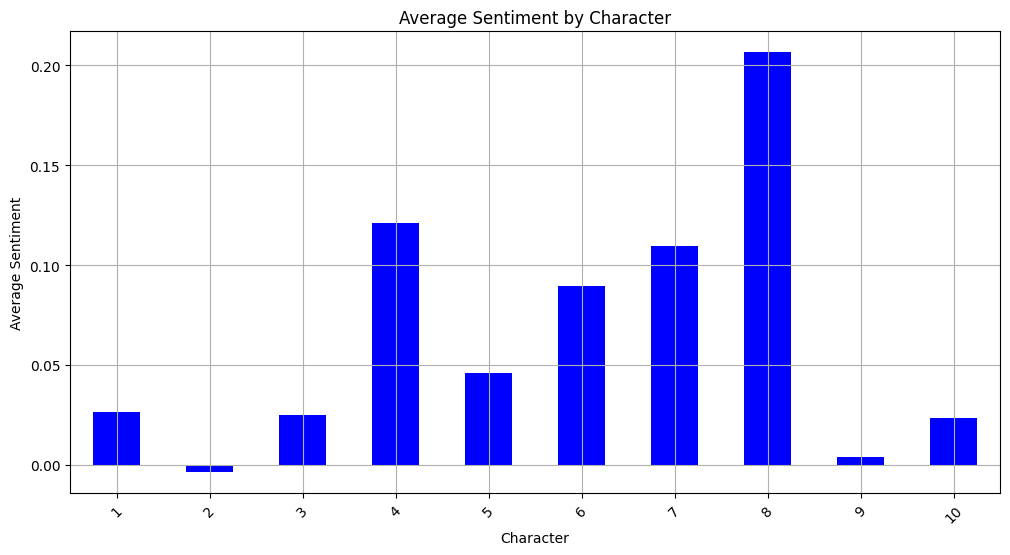

In [21]:
# Select the top 10 characters based on the number of dialogues
top_characters = df['Character ID'].value_counts().nlargest(10).index

# Filter data to include only top characters
top_char_data = df[df['Character ID'].isin(top_characters)]

# Plot sentiment by characters
fig, ax = plt.subplots(figsize=(12, 6))
top_char_data.groupby('Character ID')['sentiment'].mean().plot(kind='bar', ax=ax, color='b')
ax.set_xlabel('Character')
ax.set_ylabel('Average Sentiment')
ax.set_title('Average Sentiment by Character')
plt.xticks(rotation=45)
ax.grid(True)
plt.show()


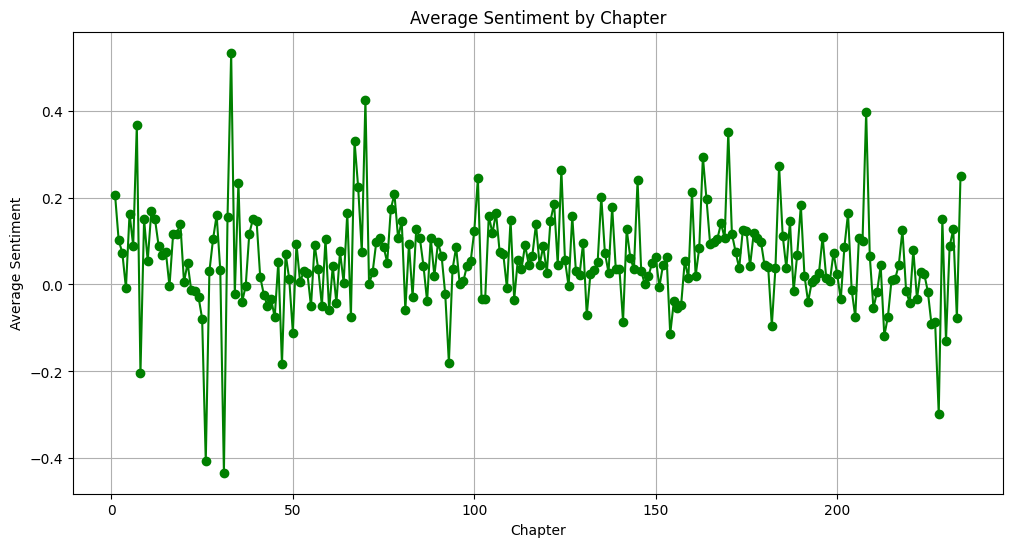

In [22]:
# Plot sentiment by chapters
fig, ax = plt.subplots(figsize=(12, 6))
df.groupby('Chapter ID')['sentiment'].mean().plot(ax=ax, marker='o', linestyle='-', color='g')
ax.set_xlabel('Chapter')
ax.set_ylabel('Average Sentiment')
ax.set_title('Average Sentiment by Chapter')
ax.grid(True)
plt.show()


I thought these were all very interesting. For example it shows that all three of the main charaters, Harry, Ron and Hermione are not that positive, while all the professors have a rather high sentiment. Also voldemort has a very low sentiment which makes sense as he is the antagonist. What is very weird however, is that snape who has the character ID 6 has a high sentiment as he is portrayed as a very negative person. Also ron has the lowest sentiment, which is weird as it compares to voldemort but I guess due to him always being a bit of a negative person who complains a lot it does make sense.

Furthermore, the anlysis of the sentiment over the chapters shows the ups amd downs of story telling and how a good book keeps on recapturing the audiences attention by creating another negative plot.

Now lets look at the most positive and negative lines within the book:

In [23]:


# Print the most negative and most positive dialogues
print("Most Negative Dialogues:")
print(list(df.sort_values('sentiment', ascending=True)['Dialogue'][:3]))

print("\nMost Positive Dialogues:")
print(list(df.sort_values('sentiment', ascending=False)['Dialogue'][:3]))


Most Negative Dialogues:
['BloodI want bloodThey all must die. Kill Kill Kill! Time to kill.', "Too much... I can't... take it... I want... to die... kill... kill me... KILL ME, HARRY!", "She was terrified when she thought we'd been in there. She kept asking you what else we'd taken. I'd bet anything there's a Horcrux there. If we find it, we can kill it. And if we kill it, we're one step closer to killing him."]

Most Positive Dialogues:
['Another year, gone! And now, as I understand it, the house cup needs awarded and the points stand thus. In fourth place: Gryffindor, with 312 points!  In third place: Hufflepuff, with 352 points!  Second: Ravenclaw, with 426 points!  And in first place, with 472 points: Slytherin house!  Yes, well done Slytherin, well done Slytherin. However, recent events must be taken into account and I have a few last minute points to award.  First, to Miss Hermione Granger, for the cool use of intellect while others were in grave peril: fifty points!  Second, to

## Topic Modeling with LDA

We already looked at the most important words within documents but lets look at the most prominent topis overall:

In [24]:
import pandas as pd
from gensim import corpora, models
import gensim

# Ensure all entries are treated as strings and handle NaN values
clean_data['Dialogue'] = clean_data['Dialogue'].fillna('')  # Replace NaN with an empty string
clean_data['Dialogue'] = clean_data['Dialogue'].astype(str)  # Ensure all entries are strings

def preprocess(text):
    # Apply simple tokenization and make text lowercase
    return text.lower().split()

# Apply preprocessing to the 'Dialogue' column
clean_data['tokens'] = clean_data['Dialogue'].apply(preprocess)

# Create a dictionary and corpus needed for Topic Modeling
dictionary = corpora.Dictionary(clean_data['tokens'])
corpus = [dictionary.doc2bow(text) for text in clean_data['tokens']]

# LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=10,  # Adjust number of topics as needed
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

# Print the topics found by the LDA model
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    # Parse the topic output to show only words
    topic_words = ", ".join([word.split("*")[1].replace('"', '') for word in topic[1].split("+")])
    print(f"Topic #{topic[0] + 1}: {topic_words}")



Topic #1: boy , kill , thing , long , bloody , bit , brilliant , killed , mad , found
Topic #2: find , draco , professor , luna , life , hell , put , snape , mum , trust
Topic #3: tom , feel , mind , idea , bellatrix , riddle , excuse , promise , dear , hour
Topic #4: sir , dobby , ministry , tonight , plan , ginny , smell , lot , bring , calling
Topic #5: potter , wand , time , mr , make , horcrux , neville , elder , destroy , remember
Topic #6: ron , thought , hogwarts , day , leave , end , real , thinking , listen , kind
Topic #7: harry , severus , year , place , die , wizard , answer , ready , sirius , work
Topic #8: lord , dumbledore , good , back , give , shes , told , knew , dead , voldemort
Topic #9: yeah , reckon , coming , youknowwho , lestrange , magical , moment , stupid , lying , fine
Topic #10: hermione , snake , night , hold , son , madam , step , hollow , godrics , griphook


In [25]:
for topic_num, topic in topics:
    # Parse the topic output to show only words
    print("Topic #{}:".format(topic_num + 1) + " " + "".join([word.split("*")[1].replace('"', '') for word in topic.split("+")]))

Topic #1: boy kill thing long bloody bit brilliant killed mad found
Topic #2: find draco professor luna life hell put snape mum trust
Topic #3: tom feel mind idea bellatrix riddle excuse promise dear hour
Topic #4: sir dobby ministry tonight plan ginny smell lot bring calling
Topic #5: potter wand time mr make horcrux neville elder destroy remember
Topic #6: ron thought hogwarts day leave end real thinking listen kind
Topic #7: harry severus year place die wizard answer ready sirius work
Topic #8: lord dumbledore good back give shes told knew dead voldemort
Topic #9: yeah reckon coming youknowwho lestrange magical moment stupid lying fine
Topic #10: hermione snake night hold son madam step hollow godrics griphook


As these topics are a bit hard to understand lets see

In [27]:
# Analyze topic distribution for each document
doc_topics = [lda_model.get_document_topics(item) for item in corpus]

# Determine the top document for Topic 1
topic_id = 0  # Topics are zero-indexed, so Topic 1 is ID 0
top_doc_for_topic_1, max_contribution = None, 0

for i, doc_distribution in enumerate(doc_topics):
    for topic_num, contrib in doc_distribution:
        if topic_num == topic_id and contrib > max_contribution:
            max_contribution = contrib
            top_doc_for_topic_1 = i

# Print results
if top_doc_for_topic_1 is not None:
    print(f"Top document for Topic 1 is Document #{top_doc_for_topic_1 + 1} with a contribution of {max_contribution:.4f}:")
    print(clean_data.iloc[top_doc_for_topic_1]['tokens'])
else:
    print("No document has Topic 1 as the predominant topic.")

Top document for Topic 1 is Document #251 with a contribution of 0.5360:
['half', 'half', 'dad', 'muggle', 'mam', 'witch', 'bit', 'nasty', 'shock', 'found']


In my opinion this makes sense as the first topic is most likely about harry potter as he is the main character, and this document mentions his name twice.

## Bertopic topic Modelling

But now lets try topic modelling with Bertopic to see if we can get better results that are easier to understand.

In [30]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from bertopic import BERTopic

def analyze_topics(texts):
    """
    Analyze topics in the given text using BERTopic.
    """
    # Initialize BERTopic model
    model = BERTopic(verbose=True, embedding_model='paraphrase-MiniLM-L3-v2', min_topic_size=7)
    topics, _ = model.fit_transform(texts)

    # Get and display topic information
    freq = model.get_topic_info()
    print("Number of topics: {}".format(len(freq)))
    display(freq.head(20))

    return model, topics

# Apply topic analysis
model, topics = analyze_topics(clean_data['Dialogue'])

# Assign topics back to the DataFrame
clean_data['topic'] = topics



2024-12-03 20:40:40,765 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.04k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/69.6M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/203 [00:00<?, ?it/s]

2024-12-03 20:41:05,097 - BERTopic - Embedding - Completed ✓
2024-12-03 20:41:05,103 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-12-03 20:41:47,904 - BERTopic - Dimensionality - Completed ✓
2024-12-03 20:41:47,906 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-12-03 20:41:48,223 - BERTopic - Cluster - Completed ✓
2024-12-03 20:41:48,232 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-12-03 20:41:48,584 - BERTopic - Representation - Completed ✓


Number of topics: 269


,Topic,Count,Name,Representation,Representative_Docs
0,-1,1030,-1_harry_hermione_girl_albus,"[harry, hermione, girl, albus, blimey, shut, l...",[nice big smile harry rate front page lady gen...
1,0,151,0_harry_harrys_charming_babberton,"[harry, harrys, charming, babberton, educated,...","[harry, harry, harry]"
2,1,96,1_sir_split_wondered_necessarily,"[sir, split, wondered, necessarily, rejoin, co...","[sir, sir, sir]"
3,2,94,2_potter_sticky_concern_hand,"[potter, sticky, concern, hand, warned, wood, ...","[potter, potter, potter]"
4,3,88,3_dumbledore_dumbledores_belonged_belief,"[dumbledore, dumbledores, belonged, belief, hi...","[dumbledore, dumbledore, dumbledore]"
5,4,76,4_hagrid_platform_goodbye_cabin,"[hagrid, platform, goodbye, cabin, midst, fire...","[hagrid, hagrid, hagrid]"
6,5,68,5_professor_misunderstand_master_lupin,"[professor, misunderstand, master, lupin, mood...","[professor, professor, professor]"
7,6,68,6_voldemort_voldemorts_lord_amount,"[voldemort, voldemorts, lord, amount, discover...","[voldemort, voldemort, voldemort]"
8,7,62,7_hermione_hermiones_skin_conjuring,"[hermione, hermiones, skin, conjuring, ssomeon...","[hermione, hermione, hermione]"
9,8,58,8_laugh_strange_idiot_funny,"[laugh, strange, idiot, funny, kidding, ridicu...",[good easy part incantation finish boggart lau...


So still a bit confusing but definitly better than with LDA, it is also structured better.

In [31]:
# Visualize the topics in different ways to get a sense for them.
model.visualize_topics()

In [32]:
model.visualize_barchart()

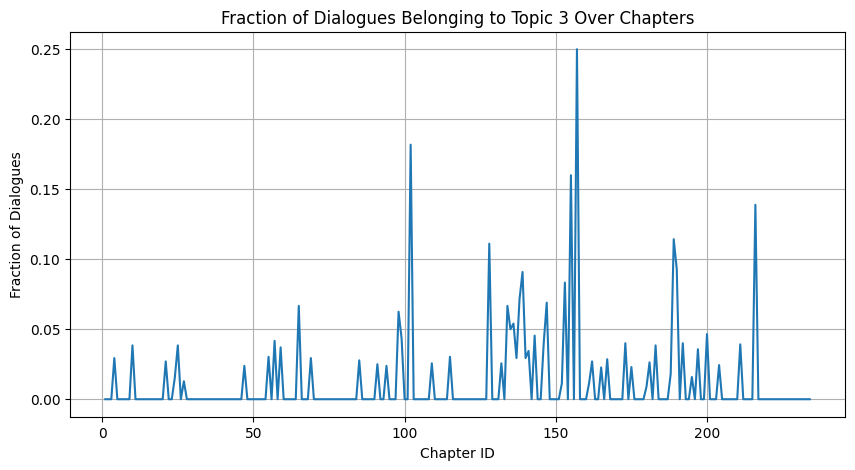

In [40]:
# Plot the frequency of a specific topic over chapters
def plot_topic_by_chapter(df, topic_num):
    """
    Plot the frequency of a specific topic over chapters.
    """
    # Ensure Chapter ID is numeric for proper sorting
    df['Chapter ID'] = pd.to_numeric(df['Chapter ID'], errors='coerce')

    # Group by Chapter ID and topic
    chapter_topic_count = df.groupby(['Chapter ID', 'topic']).size().unstack(fill_value=0)

    # Calculate the fraction of dialogues belonging to the topic
    if topic_num in chapter_topic_count.columns:
        chapter_topic_fraction = chapter_topic_count[topic_num] / chapter_topic_count.sum(axis=1)
    else:
        print(f"Topic {topic_num} is not found in the data.")
        return

    # Plotting
    chapter_topic_fraction.plot(kind='line', figsize=(10, 5))
    plt.title(f'Fraction of Dialogues Belonging to Topic {topic_num} Over Chapters')
    plt.ylabel('Fraction of Dialogues')
    plt.xlabel('Chapter ID')
    plt.grid(True)
    plt.show()

# Specify the topic number you are interested in
TOPIC = 3  # Dumbeldore
plot_topic_by_chapter(clean_data, TOPIC)

The most dialogues belonging to chapter 3, which from what I can discern is about Dumbeldore, happen at around 155-160 chapters which makes sense as that is when harry hunts horcruxes with him and when Dumbeldore eventually dies.

Overall I actually had a lot of fun working with this dataset and exploring these NLP techniques. My favorite was defenitly VADER as it gave me some results different than what I expected. Thank you!